# Assignment 6

 In this assignment, we will delve into dimensionality reduction and unsupervised learning
 tasks. Firstly, we should preprocess the provided dataset to prepare it for analysis. Next, we
 will apply dimensionality reduction techniques to simplify the dataset's complexity. Then, we
 will use unsupervised learning algorithms to tackle the task. Finally, we evaluate and analyze
 the results for comparison.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('diabetic_data.csv')

This function is designed to create and display visualizationsfor a given number of features in a DataFrame df.

In [3]:
def plot_features(df, n_cols = 4, max_plots=50):
    n_rows = min(len(df.columns) // n_cols + (len(df.columns) % n_cols > 0), max_plots // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        if i >= n_rows * n_cols:
            break
        ax = axes[i]
        if df[column].dtype == 'object' or df[column].dtype == 'category':
            df[column].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(f'Bar Plot of {column}')
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
        else:
            df[column].plot(kind='hist', bins=30, ax=ax)
            ax.set_title(f'Histogram of {column}')
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')

    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


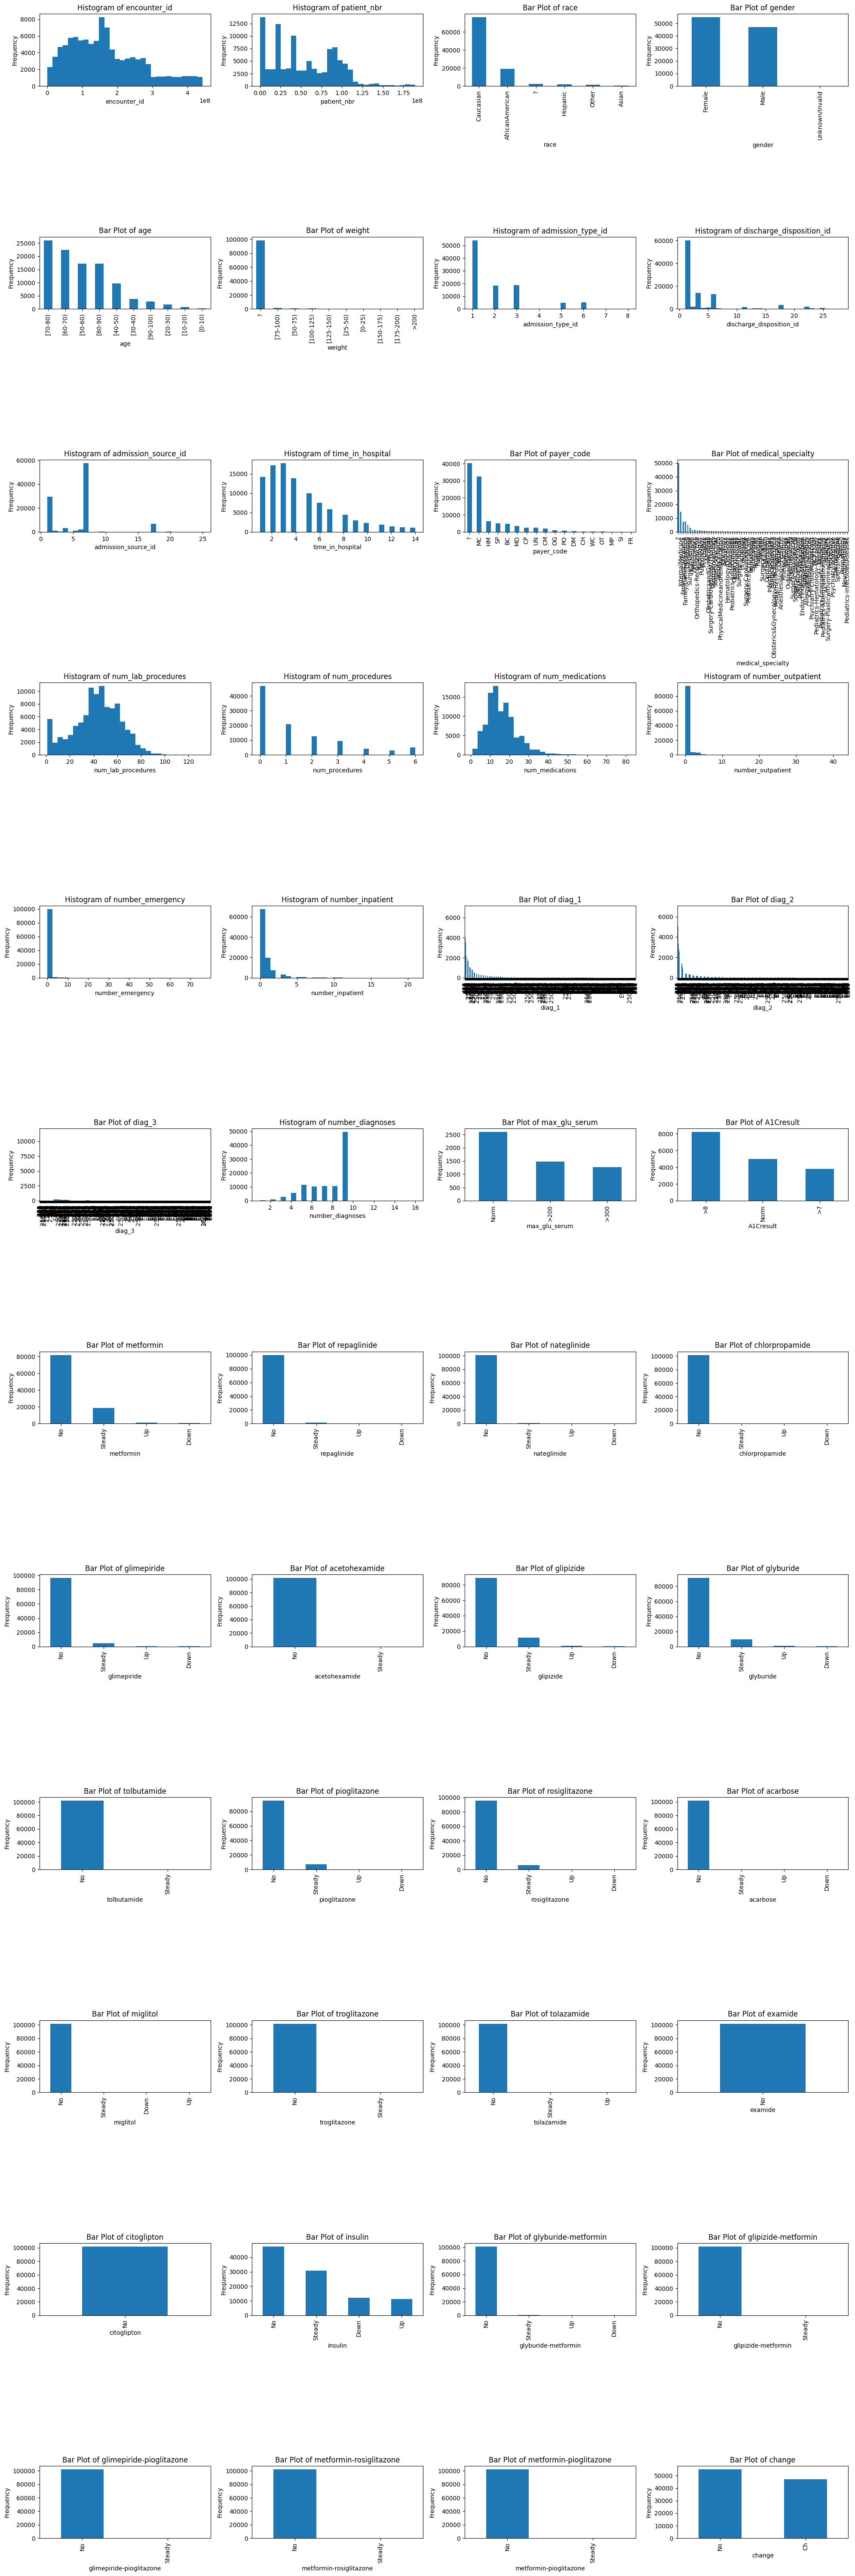

In [4]:
plot_features(df)

In [5]:
df['change'] = df['change'].replace('Ch', 'Yes')

In [6]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

### Preprocessing

In [7]:
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

max_glu_serum    96420
A1Cresult        84748
dtype: int64

In [10]:
df = df.drop(columns=['A1Cresult', 'max_glu_serum'])

In [11]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride                      4
acetohexamide                    2
glipizide           

In [12]:
df = df.drop(columns=['encounter_id', 'patient_nbr'])

In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column {column}:")
    print(unique_values)
    print("\n")

Unique values for column race:
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


Unique values for column gender:
['Female' 'Male' 'Unknown/Invalid']


Unique values for column age:
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


Unique values for column weight:
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


Unique values for column admission_type_id:
[6 1 2 3 4 5 8 7]


Unique values for column discharge_disposition_id:
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]


Unique values for column admission_source_id:
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]


Unique values for column time_in_hospital:
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


Unique values for column payer_code:
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']


Unique values for column medical_specialty

In [14]:
df = df.drop(columns=['examide', 'citoglipton'])

In [15]:
df['diag_2'] = df['diag_2'].replace('?', 'Not Applicable')
df['diag_3'] = df['diag_3'].replace('?', 'Not Applicable')
df.replace('?', np.nan, inplace=True)
df['gender'] = df['gender'].replace('Unknown/Invalid', np.nan)
df['admission_type_id'] = df['admission_type_id'].replace(6, np.nan).replace(8, np.nan).replace(5, np.nan)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(18, np.nan).replace(25, np.nan).replace(26, np.nan)
df['admission_source_id'] = df['admission_source_id'].replace(17, np.nan).replace(20, np.nan).replace(21, np.nan).replace(15, np.nan)

In [16]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

race                         2273
gender                          3
weight                      98569
admission_type_id           10396
discharge_disposition_id     4680
admission_source_id          6942
payer_code                  40256
medical_specialty           49949
diag_1                         21
dtype: int64

In [17]:
df = df.drop(columns=['weight', 'medical_specialty', 'payer_code'])

In [18]:
null_counts = df.isna().sum(axis=1)
rows_with_nulls = df[null_counts >= 1]

In [19]:
rows_with_nulls

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,NaN,1.0,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
19,NaN,Male,[70-80),3.0,6.0,2.0,6,42,2,23,...,No,Steady,No,No,No,No,No,Yes,Yes,NO
20,NaN,Female,[50-60),2.0,1.0,4.0,2,66,1,19,...,No,Down,No,No,No,No,No,Yes,Yes,NO
21,NaN,Male,[60-70),2.0,1.0,4.0,2,36,2,11,...,No,Steady,No,No,No,No,No,Yes,Yes,NO
54,NaN,Female,[60-70),3.0,1.0,2.0,4,54,4,4,...,No,Down,No,No,No,No,No,Yes,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101692,AfricanAmerican,Female,[50-60),NaN,6.0,NaN,4,38,2,22,...,No,Down,No,No,No,No,No,Yes,Yes,NO
101702,NaN,Male,[70-80),1.0,3.0,7.0,5,57,0,19,...,No,Down,No,No,No,No,No,Yes,Yes,>30
101715,NaN,Male,[50-60),1.0,6.0,7.0,13,74,6,64,...,No,Down,No,No,No,No,No,Yes,Yes,NO
101724,AfricanAmerican,Male,[60-70),NaN,6.0,NaN,7,91,4,23,...,No,No,No,No,No,No,No,No,Yes,NO


In [20]:
df.dropna(inplace=True)
df['admission_type_id'] = df['admission_type_id'] .astype('int64')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('int64')
df['admission_source_id'] = df['admission_source_id'].astype('int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84501 entries, 1 to 101765
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      84501 non-null  object
 1   gender                    84501 non-null  object
 2   age                       84501 non-null  object
 3   admission_type_id         84501 non-null  int64 
 4   discharge_disposition_id  84501 non-null  int64 
 5   admission_source_id       84501 non-null  int64 
 6   time_in_hospital          84501 non-null  int64 
 7   num_lab_procedures        84501 non-null  int64 
 8   num_procedures            84501 non-null  int64 
 9   num_medications           84501 non-null  int64 
 10  number_outpatient         84501 non-null  int64 
 11  number_emergency          84501 non-null  int64 
 12  number_inpatient          84501 non-null  int64 
 13  diag_1                    84501 non-null  object
 14  diag_2                    

In [22]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,84501.000000,84501.000000,84501.000000,84501.000000,84501.000000,84501.000000,84501.000000,84501.000000,84501.000000,84501.000000,84501.000000
mean,1.615389,2.963018,5.009385,4.382646,43.660572,1.339996,15.995870,0.356138,0.208447,0.652134,7.517012
std,0.811268,4.119179,2.746375,2.976833,19.389357,1.708932,8.120738,1.257067,0.981162,1.285143,1.913177
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,33.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,45.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000
75%,2.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,7.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [23]:
code_mapping = {
    range(390, 460): "Circulatory",
    range(785, 786): "Circulatory",
    range(460, 520): "Respiratory",
    range(786, 787): "Respiratory",
    range(520, 580): "Digestive",
    range(787, 788): "Digestive",
    range(250, 251): "Diabetes",
    range(800, 1000): "Injury",
    range(710, 740): "Musculoskeletal",
    range(580, 630): "Genitourinary",
    range(788, 789): "Genitourinary",
    range(140, 240): "Neoplasms",
    range(780, 782): "Other",
    range(784, 785): "Other",
    range(789, 800): "Other",
    range(240, 250): "Endocrine",
    range(251, 280): "Endocrine",
    range(783, 784): "Endocrine",
    range(680, 710): "Skin",
    range(782, 783): "Skin",
    range(1, 140): "Infectious",
    range(290, 320): "Mental",
    range(280, 290): "Blood",
    range(320, 360): "Nervous",
    range(630, 680): "Pregnancy",
    range(360, 390): "Sense",
    range(740, 760): "Congenital"
}

def map_code_to_category(in_code):
    code = in_code.split('.')[0]
    if isNotApplicable(code):
        return code
    if firstDigitLetterEorV(code):
        return "External"
    else:
        for code_range, category in code_mapping.items():
            if int(code) in code_range:
                return category
    return '?' 

def firstDigitLetterEorV(code):
    return code[0] == 'E' or code[0] == 'V'
def isNotApplicable(code):
    return code == "Not Applicable"

In [24]:
df["diag_1"] = df["diag_1"].apply(map_code_to_category)
df["diag_2"] = df["diag_2"].apply(map_code_to_category)
df["diag_3"] = df["diag_3"].apply(map_code_to_category)

In [25]:
df.nunique()


race                          5
gender                        2
age                          10
admission_type_id             5
discharge_disposition_id     20
admission_source_id          15
time_in_hospital             14
num_lab_procedures          114
num_procedures                7
num_medications              75
number_outpatient            38
number_emergency             33
number_inpatient             20
diag_1                       19
diag_2                       20
diag_3                       20
number_diagnoses             16
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglitazone                 4
acarbose                      4
miglitol                      4
troglitazone                  2
tolazami

In [26]:
#plot_features(df)

In [27]:
df = df.drop(columns=['metformin-rosiglitazone'])

The function is used to encode the medication dosage information in a DataFrame 

In [28]:
def encodeMedDosage(df):
    med_mapping = {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3}
    
    df['metformin-pioglitazone'] = df['metformin-pioglitazone'].map(med_mapping)
    df['glyburide-metformin'] = df['glyburide-metformin'].map(med_mapping)
    df['insulin'] = df['insulin'].map(med_mapping)
    df['tolazamide'] = df['tolazamide'].map(med_mapping)
    df['troglitazone'] = df['troglitazone'].map(med_mapping)
    df['miglitol'] = df['miglitol'].map(med_mapping)
    df['acarbose'] = df['acarbose'].map(med_mapping)
    df['rosiglitazone'] = df['rosiglitazone'].map(med_mapping)
    df['pioglitazone'] = df['pioglitazone'].map(med_mapping)
    df['tolbutamide'] = df['tolbutamide'].map(med_mapping)
    df['glyburide'] = df['glyburide'].map(med_mapping)
    df['glipizide'] = df['glipizide'].map(med_mapping)
    df['acetohexamide'] = df['acetohexamide'].map(med_mapping)
    df['glimepiride'] = df['glimepiride'].map(med_mapping)
    df['chlorpropamide'] = df['chlorpropamide'].map(med_mapping)
    df['repaglinide'] = df['repaglinide'].map(med_mapping)
    df['nateglinide'] = df['nateglinide'].map(med_mapping)
    df['metformin'] = df['metformin'].map(med_mapping)
    df['glipizide-metformin'] = df['glipizide-metformin'].map(med_mapping)
    df['glimepiride-pioglitazone'] = df['glimepiride-pioglitazone'].map(med_mapping)
    
    return df

These are five separate functions that are used to encode categorical data into numerical data in a DataFrame 

In [29]:
def encodeAge(df):
    age_mapping = {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, 
                   '[70-80)': 7, '[80-90)': 8, '[90-100)': 9}
    df['age'] = df['age'].map(age_mapping)
    return df
def encodeReadmitted(df):    
    readmitted_mapping = {'NO': 0, '>30': 1, '<30': 2}
    df['readmitted'] = df['readmitted'].map(readmitted_mapping)
    return df
def encodeGender(df):    
    gender_mapping = {'Male': 0, 'Female': 1}
    df['gender'] = df['gender'].map(gender_mapping)
    return df
def encodeChange(df):    
    change_mapping = {'No': 0, 'Yes': 1}
    df['change'] = df['change'].map(change_mapping)
    return df
def encodeDiabetesMed(df):    
    diabetes_med_mapping = {'No': 0, 'Yes': 1}
    df['diabetesMed'] = df['diabetesMed'].map(diabetes_med_mapping)
    return df

In [30]:
df = encodeAge(df)
df = encodeReadmitted(df)
df = encodeMedDosage(df)
df = encodeGender(df)
df = encodeChange(df)
df = encodeDiabetesMed(df)

This code block is used to perform one-hot encoding on several categorical columns in a DataFrame.

In [31]:
race_dummies = pd.get_dummies(df['race'], prefix='race')
admission_type_dummies = pd.get_dummies(df['admission_type_id'], prefix='admission_type')
discharge_dummies = pd.get_dummies(df['discharge_disposition_id'], prefix='discharge')
admission_source_dummies = pd.get_dummies(df['admission_source_id'], prefix='admission_source')
diag_1_dummies = pd.get_dummies(df['diag_1'], prefix='diag_1')
diag_2_dummies = pd.get_dummies(df['diag_2'], prefix='diag_2')
diag_3_dummies = pd.get_dummies(df['diag_3'], prefix='diag_3')

df = pd.concat([df, race_dummies, admission_type_dummies, discharge_dummies, 
                        admission_source_dummies, diag_1_dummies, diag_2_dummies, diag_3_dummies], axis=1)

df.drop(['race', 'admission_type_id', 'discharge_disposition_id', 
                 'admission_source_id', 'diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)


In [32]:
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype('int64')
df.dtypes

gender                int64
age                   int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
                      ...  
diag_3_Other          int64
diag_3_Pregnancy      int64
diag_3_Respiratory    int64
diag_3_Sense          int64
diag_3_Skin           int64
Length: 137, dtype: object

In [33]:
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,diag_3_Mental,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Applicable,diag_3_Other,diag_3_Pregnancy,diag_3_Respiratory,diag_3_Sense,diag_3_Skin
1,1,1,3,59,0,18,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
2,1,2,2,11,5,13,2,0,1,6,...,0,0,0,0,0,0,0,0,0,0
3,0,3,2,44,1,16,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
4,0,4,1,51,0,8,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5,0,5,3,31,6,16,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0


In [34]:
scaler = RobustScaler()
for col in df.columns:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [35]:
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,diag_3_Mental,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Applicable,diag_3_Other,diag_3_Pregnancy,diag_3_Respiratory,diag_3_Sense,diag_3_Skin
1,0.0,-2.5,-0.25,0.583333,-0.5,0.3,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-2.0,-0.50,-1.416667,2.0,-0.2,2.0,0.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,-1.5,-0.50,-0.041667,0.0,0.1,0.0,0.0,0.0,-0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,-1.0,-0.75,0.250000,-0.5,-0.7,0.0,0.0,0.0,-1.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-1.0,-0.5,-0.25,-0.583333,2.5,0.1,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#plot_features(df, 10, 150)

In [37]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [38]:
df = df.dropna()

In [39]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

### PCA

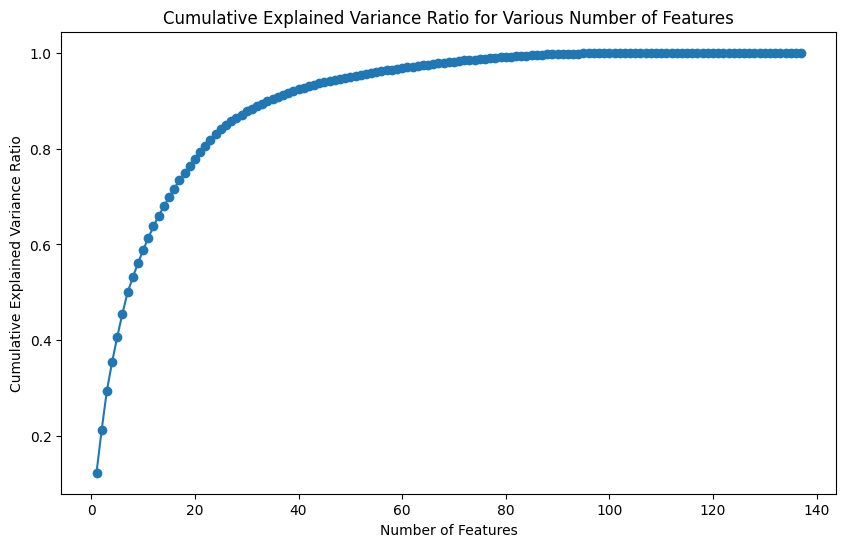

In [41]:
def plotPCA(num_of_features, cumulative_variance_ratios):
    plt.figure(figsize=(10, 6))
    plt.plot(num_of_features, cumulative_variance_ratios, marker='o')
    plt.title("Cumulative Explained Variance Ratio for Various Number of Features")
    plt.xlabel("Number of Features")
    plt.ylabel("Cumulative Explained Variance Ratio")
    plt.show()

pca = PCA()
pca.fit(df)
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratios = np.cumsum(explained_variance_ratios)
num_of_features = np.arange(1, len(explained_variance_ratios) + 1)

plotPCA(num_of_features, cumulative_variance_ratios)

### Unsupervised Learning

This code block performs dimensionality reduction using Principal Component Analysis (PCA) and then determines the optimal number of clusters for K-Means clustering using the Silhouette Method.

In [40]:

def bestKmeans(df_reduced, range_n_clusters, variance_ratio):
    best_k = 0
    best_silhouette_score = -1
    silhouette_scores = []

    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = kmeans.fit_predict(df_reduced)
        silhouette_avg = silhouette_score(df_reduced, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_k = n_clusters
            
    plotScores(range_n_clusters, silhouette_scores, variance_ratio)
    return (best_k, best_silhouette_score)

def getReducedDF(df, variance_ratio = 0.7):
    pca = PCA(n_components=variance_ratio )  
    df_reduced = pca.fit_transform(df)
    print("Number of principal components:", pca.n_components_)
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    return df_reduced

# Plotting silhouette scores
def plotScores(range_n_clusters, silhouette_scores, variance_ratio):
    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, silhouette_scores, marker='o')
    plt.title("Silhouette Scores for Various Numbers of Clusters for the Variance Ratio of " + str(variance_ratio))
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

In [44]:
best_pca_ratio = 0.6
df_reduced = getReducedDF(df, best_pca_ratio)

Number of principal components: 11
Explained variance ratio: [0.12374443 0.08970374 0.0811684  0.05939504 0.05315036 0.04839981
 0.0443056  0.03125505 0.02984543 0.02715845 0.02540724]


Original number of features: 137
Number of principal components: 8


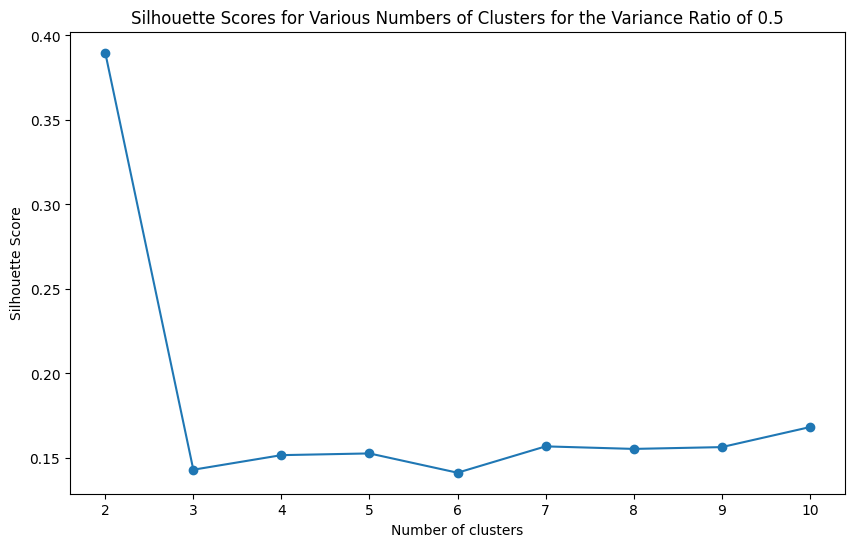

Number of principal components: 11


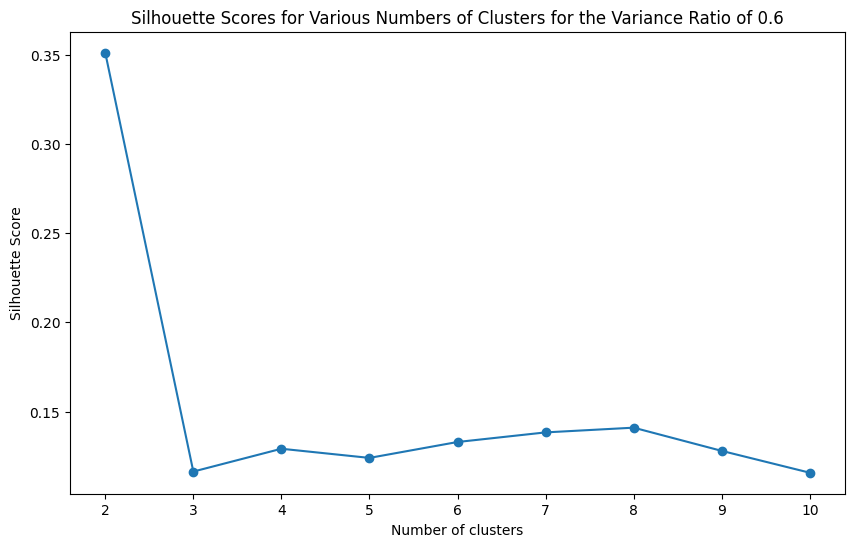

Number of principal components: 16


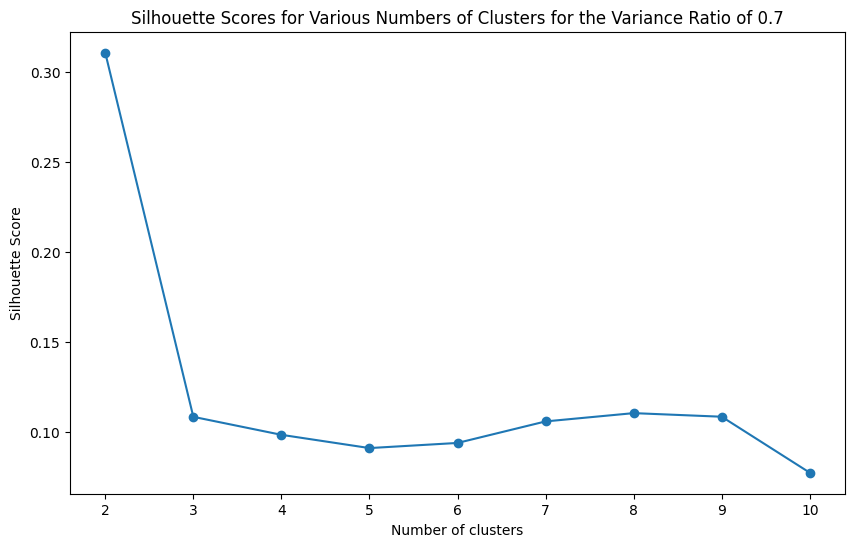

Number of principal components: 22


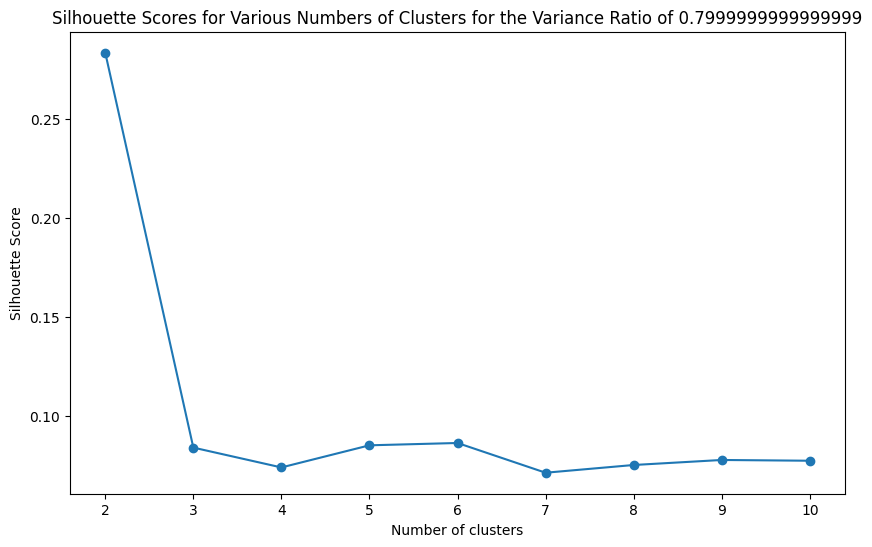

Number of principal components: 35


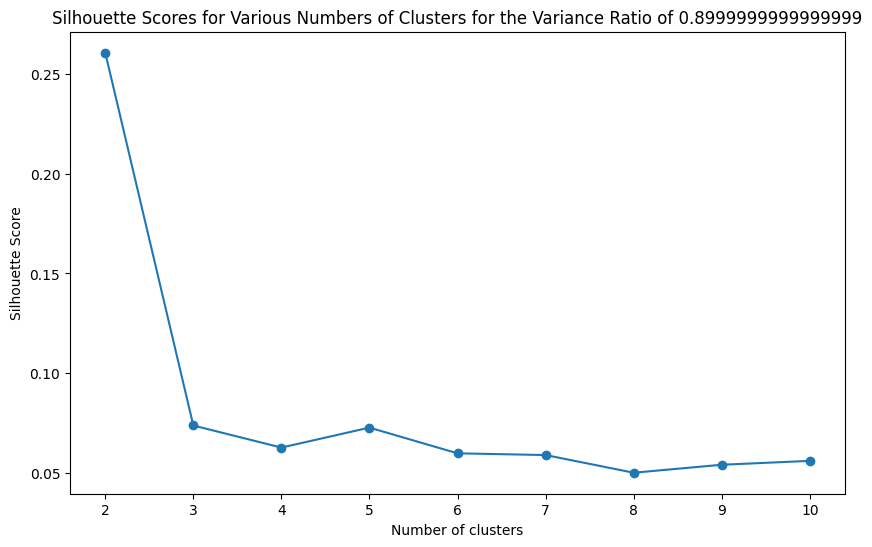

The optimal number of clusters for K-Means is 2 and the optimal PCA is 0.8999999999999999


In [43]:
print(f'Original number of features: {df.shape[1]}')

range_n_clusters = list(range(2, 11))
best_k = 0
best_silhouette_score = -1
best_variance_ratio = 0
variance_ratios = np.arange(0.5, 1.0, 0.1)
for variance_ratio in variance_ratios:
    df_reduced = getReducedDF(df, variance_ratio)
    temp_best_k = 0
    temp_best_silhouette_score = -1
    (temp_best_k, temp_best_silhouette_score) = bestKmeans(df_reduced, range_n_clusters, variance_ratio)

    if(temp_best_silhouette_score > best_silhouette_score):
        best_silhouette_score = temp_best_silhouette_score
        best_k = temp_best_k
        best_variance_ratio = variance_ratio
    

print(f'The optimal number of clusters for K-Means is {best_k} and the optimal PCA is {variance_ratio}')


In [42]:
best_pca_ratio = 0.6
df_reduced = getReducedDF(df, best_pca_ratio)

Number of principal components: 11
Explained variance ratio: [0.12374443 0.08970374 0.0811684  0.05939504 0.05315036 0.04839981
 0.0443056  0.03125505 0.02984543 0.02715845 0.02540724]


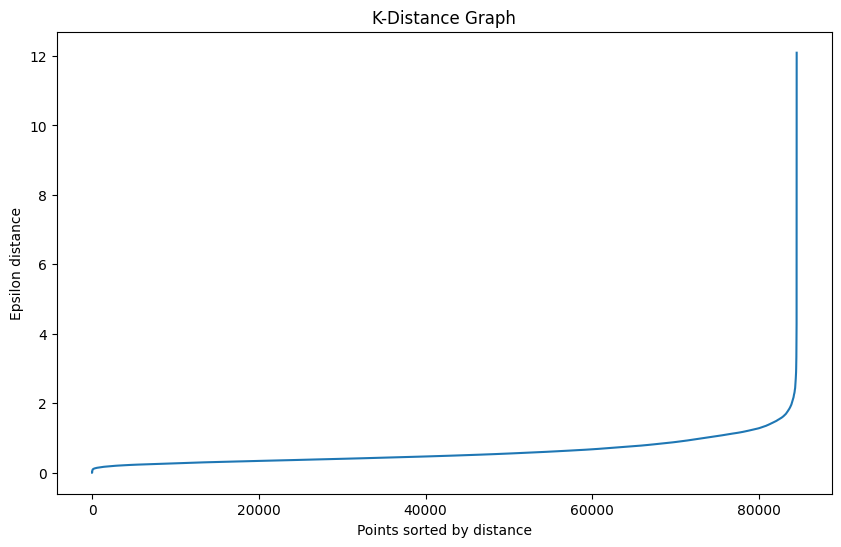

In [45]:

neighbors = NearestNeighbors(n_neighbors=5)  # Choose 5 as a common heuristic
neighbors_fit = neighbors.fit(df_reduced)
distances, indices = neighbors_fit.kneighbors(df_reduced)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.show()


This code block performs dimensionality reduction using Principal Component Analysis (PCA) and then determines the optimal number of epsilons for a given min_sample for DBSCAN using the Silhouette Method.

In [46]:
best_silhouette_score = -1
best_eps = 0
best_minPts = 10
optimal_eps = np.arange(0.1, 1, 0.1)
for optimal_ep in optimal_eps:
    dbscan = DBSCAN(eps=optimal_ep, min_samples=best_minPts)
    cluster_labels = dbscan.fit_predict(df)
    if len(set(cluster_labels)) > 1: 
        silhouette_avg = silhouette_score(df, cluster_labels)
        print(f'Silhouette score of eps: {optimal_ep} and minPts: {best_minPts} is : {silhouette_avg}')
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = optimal_ep
            

print(f'The optimal parameters for DBSCAN are eps={optimal_eps} and min_samples={best_minPts}')
print(f'Best silhouette score: {best_silhouette_score}')
print(f'Best epsilon: {best_eps}')

Silhouette score of eps: 0.6 and minPts: 10 is : 0.06582285270370193
Silhouette score of eps: 0.7000000000000001 and minPts: 10 is : -0.04995994644617837
Silhouette score of eps: 0.8 and minPts: 10 is : -0.18487916675007005
Silhouette score of eps: 0.9 and minPts: 10 is : -0.1850768557999599
The optimal parameters for DBSCAN are eps=[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] and min_samples=10
Best silhouette score: 0.06582285270370193
Best epsilon: 0.6


In [47]:
pca_kmeans = PCA(n_components=best_pca_ratio)
df_reduced_kmeans = pca_kmeans.fit_transform(df)

pca_dbscan = PCA(n_components=best_pca_ratio)
df_reduced_dbscan = pca_dbscan.fit_transform(df)

kmeans = KMeans(n_clusters=best_k, random_state=10)
kmeans_labels = kmeans.fit_predict(df_reduced_kmeans)

dbscan = DBSCAN(eps=best_eps, min_samples=best_minPts)
dbscan_labels = dbscan.fit_predict(df_reduced_dbscan)

df['kmean_label'] = kmeans_labels
df['dbscan_label'] = dbscan_labels

results = pd.DataFrame({
    'id_encounter': df.index,
    'kmean_label': kmeans_labels,
    'dbscan_label': dbscan_labels
})
results.to_csv('clustering_results.csv', index=False)


# Question:

### 1.  What preprocessing steps did you perform on the dataset? Provide clear reasons for each decision made.
1. **Dropping Duplicates:** We tried dropping duplicate rows but there weren't any.

2. **Categorical Refinement:** We turned the ICD9 codes of diag_1, diag_2, and diag_3 into broader categorical values according to the table in the article: https://www.hindawi.com/journals/bmri/2014/781670/tab2/

3. **Dropping Null Rows:** We dropped all rows that contained any "N/A" columns or "?". Regarding diag_2 and diag_3, which were the secondary diagnoses and additional secondary diagnoses, we did not delete null values as they may have been null because they only had a primary diagnoses. Regarding the admission id, admission sources, and discharge disposition, we also regarded some values as null, such as not mapped, null itself, and not available.

4. **Dropping Incomplete Columns:** We dropped some columns that had a high rate of null values, such as weight, medical specialty, and payer code. 

5. **Dropping Unique Rows:** We removed rows that had unique numbers such as id_counter and patient_number

5. **Categorical to Numerical:** We encoded all categorical columns into numerical ones. All columns related to medical dosages, age, and readmission are ordinally encoded. Gender, change, and diabetes med are binary encoded, and the rest are one hot encoded, including admission id, admission sources, and discharge disposition.

6. **Normalization:** We used Robust Scaler due to the high possibility of large outliers in our dataset, which we saw when plotting the features.

### 2.  What portion of the dataset did you retain during dimensionality reduction, and which variables were retained? Could you elaborate on the rationale behind this decision?

**Variables Retained**

PCA doesn't retain specific original variables but instead creates new variables (principal components) that are linear combinations of the original variables. These new components capture the directions of maximum variance in the data. Each principal component is a combination of all original features, weighted by their contribution to that component.



**Rationale Behind the Decision**

*Variance Retention:* By retaining 60% of the variance, we ensure that the reduced dataset still captures the majority of the variability present in the original data, which is crucial for maintaining the integrity of the data's structure.


*Computational Efficiency:* Reducing the number of features simplifies the computational process, making clustering algorithms like K-Means and DBSCAN more efficient and less prone to overfitting.

*Interpretability:* While the reduced dataset is easier to work with, we still retain enough components to interpret the underlying data structure meaningfully.

### 3. Include a plot illustrating the silhouette coefficient plotted against the input parameters for each clustering method within the report file.

### 4. How can we determine the optimal number of clusters in K-Means?

There are several methods to determine the optimal number of clusters in K-Means clustering. Here are some of the most commonly used methods:

1. **Elbow Method**: This method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. The optimal number of clusters is the one at the "elbow" of the graph, where the WCSS decreases significantly and then starts to level off.

2. **Silhouette Method**: This method involves calculating the Silhouette score for each sample in the dataset, which is a measure of how well the sample fits into its assigned cluster. The optimal number of clusters is the one that maximizes the average Silhouette score for the dataset.

3. **Gap Statistic**: This method involves comparing the WCSS of the real dataset with the WCSS of a null reference dataset (i.e., a dataset with no clustering structure). The optimal number of clusters is the one that maximizes the gap between the WCSS of the real dataset and the null reference dataset.

4. **Davies-Bouldin Index**: This method involves calculating the Davies-Bouldin index for each pair of clusters in the dataset, which is a measure of the similarity between the clusters. The optimal number of clusters is the one that minimizes the average Davies-Bouldin index for the dataset.

5. **Calinski-Harabasz Index**: This method involves calculating the Calinski-Harabasz index for the dataset, which is a measure of the ratio of the between-cluster variance to the within-cluster variance. The optimal number of clusters is the one that maximizes the Calinski-Harabasz index.

###  5. How can we determine the optimal epsilon value and minPts in DBSCAN?

Here are some general guidelines and methods to help you choose appropriate values:

1. **Visualizing the data**: Plotting the data in 2D or 3D can help you get a sense of the density and distribution of the points, which can inform your choice of ε and minPts. For example, if the data is evenly distributed, a larger ε may be appropriate, while if the data is clustered in tight groups, a smaller ε may be better.

2. **Domain knowledge**: If you have prior knowledge about the data or the clustering structure, you can use this to guide your choice of ε and minPts. For example, if you know that the clusters are dense and well-separated, you can choose a smaller ε and a larger minPts.

3. **Trial and error**: One common approach is to try a range of values for ε and minPts and see which ones produce the best clustering results. You can use a variety of metrics to evaluate the clustering, such as the silhouette score, the Davies-Bouldin index, or the Calinski-Harabasz index.

4. **K-nearest neighbors (KNN) method**: To choose an appropriate value for ε, you can use the KNN method. For each point in the dataset, you calculate the distance to its k-th nearest neighbor, where k is a small integer (e.g., k=3 or k=5). You then plot the distances for all points and look for a "knee" in the curve, where the distances start to level off. The distance at the knee can be used as a rough estimate for ε.

5. **Heuristics**: There are several heuristics for choosing ε and minPts based on the properties of the dataset. For example, one common heuristic is to set minPts to the number of dimensions in the dataset plus 1, and to set ε to the distance between the k-th and (k+1)-th nearest neighbors of a point, where k is the number of dimensions.

### 6. When would you recommend using K-Means, and when would you suggest using DBSCAN instead?

**Use K-Means when:**

1. **You have a well-defined number of clusters**: K-Means requires you to specify the number of clusters (k) in advance, and is therefore well-suited to problems where you have a good idea of how many clusters there are.

2. **Your clusters are roughly spherical**: K-Means assumes that the clusters are convex and isotropic (i.e., have the same shape in all directions), and is therefore better suited to problems where the clusters are roughly spherical or ellipsoidal.

3. **You have a large dataset**: K-Means is computationally efficient and can scale well to large datasets, especially if you use an optimized implementation such as MiniBatch K-Means.

4. **You want to minimize the within-cluster variance**: K-Means aims to minimize the sum of squared distances between the points in a cluster and the cluster centroid, and is therefore well-suited to problems where you want to minimize the within-cluster variance.

**Use DBSCAN when:**

1. **You don't know the number of clusters in advance**: DBSCAN does not require you to specify the number of clusters in advance, and can therefore be used to discover clusters in data without prior knowledge of their number or shape.

2. **Your clusters have irregular shapes**: DBSCAN is a density-based clustering algorithm that can identify clusters of arbitrary shape, and is therefore better suited to problems where the clusters have irregular or non-convex shapes.

3. **You want to identify outliers and noise**: DBSCAN can distinguish between dense clusters and sparse regions, and can therefore be used to identify outliers and noise in the data.

4. **You have a small to medium-sized dataset**: DBSCAN can be computationally expensive for large datasets, especially if the data is high-dimensional or has a lot of noise. It is therefore better suited to small to medium-sized datasets.

5. **You want to control the density of the clusters**: DBSCAN allows you to specify the minimum number of points (minPts) required to form a dense region, and the maximum radius (ε) within which to search for neighboring points. This can be useful if you have prior knowledge of the density or spatial distribution of the clusters.
